In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("jobs.data")
print("Rows, Columns:", df.shape)

print(df.head())
print(df.info())


Rows, Columns: (10000, 9)
   job_id                  job_title           industry   location  \
0       1         Quantum Researcher  Quantum Computing  Singapore   
1       2  Renewable Energy Engineer         Green Tech  Singapore   
2       3         Quantum Researcher  Quantum Computing      Tokyo   
3       4     Sustainability Analyst         Green Tech  Singapore   
4       5    Smart Contract Engineer         Blockchain     London   

   salary_usd                         skills_required remote_option  \
0      175780      Linear Algebra, Quantum Algorithms            No   
1      137481  Climate Data Analysis, Energy Modeling           Yes   
2      182081                  Linear Algebra, Qiskit            No   
3      113822  Climate Data Analysis, Energy Modeling            No   
4       92575                          Rust, Solidity           Yes   

  company_size posting_date  
0        Large   2025-07-22  
1        Large   2025-09-26  
2       Medium   2025-12-31  
3     

skills_required
climate data analysis    2490
energy modeling          2490
quantum algorithms       1690
tensorflow               1690
ethereum                 1683
qiskit                   1682
solidity                 1669
linear algebra           1666
python                   1657
rust                     1646
Name: count, dtype: int64


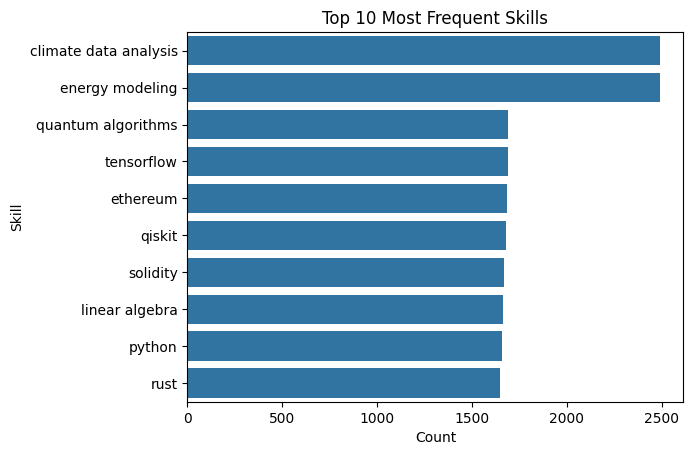

In [27]:
skills = df.skills_required.dropna()
skills = skills.str.lower()
skills = skills.str.split(",")
skills = skills.explode()
skills = skills.str.strip()

print(skills.value_counts().head(10))




sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title("Top 10 Most Frequent Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


In [13]:
df_no_remote = df[df['remote_option'] == 'No']
print("After removing remote jobs:", df_no_remote.shape)

df_high_salary = df_no_remote[df_no_remote['salary_usd'] >= 60000]
print("After dropping low salary jobs:", df_high_salary.shape)


After removing remote jobs: (4911, 9)
After dropping low salary jobs: (4649, 9)


In [28]:
counts = df_high_salary.groupby("location").industry.value_counts()
counts = counts.rename("count")
counts = counts.reset_index()

totals = df_high_salary.location.value_counts()
totals = totals.rename("total")
totals = totals.reset_index()

prob = counts.merge(totals, on="location")
prob["probability"] = prob["count"] / prob["total"]

print(prob.head())


  location           industry  count  total  probability
0   Berlin                 AI    205    751     0.272969
1   Berlin  Quantum Computing    188    751     0.250333
2   Berlin         Blockchain    181    751     0.241012
3   Berlin         Green Tech    177    751     0.235686
4    Dubai         Green Tech    199    774     0.257106


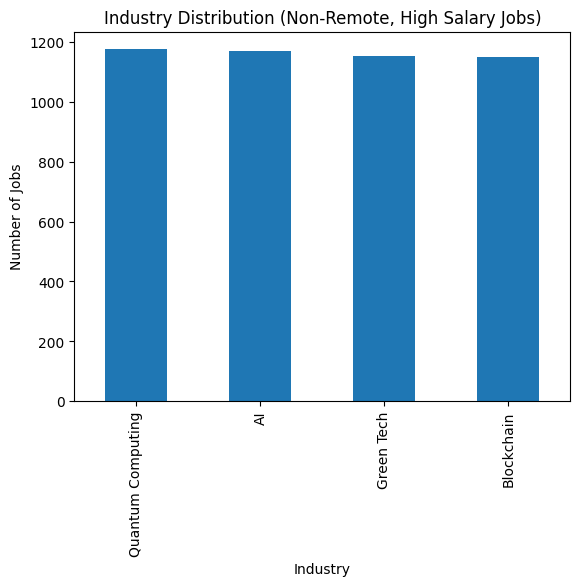

In [29]:

df_high_salary['industry'].value_counts().plot(kind='bar')
plt.title("Industry Distribution (Non-Remote, High Salary Jobs)")
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.show()


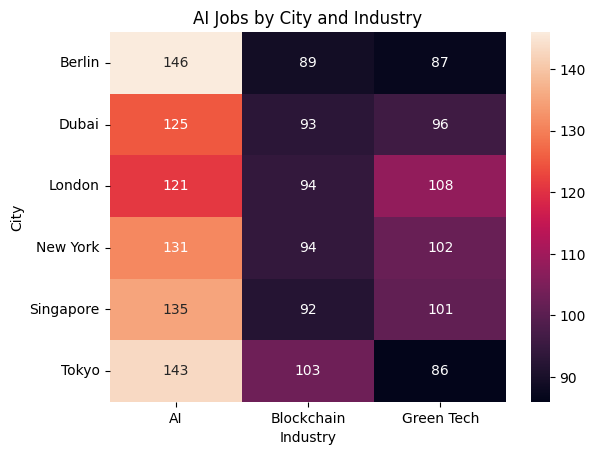

In [30]:
heatmap_data = ai_jobs.groupby("location").industry.value_counts()
heatmap_data = heatmap_data.unstack().fillna(0)

plt.figure()
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d" 
)

plt.title("AI Jobs by City and Industry")
plt.xlabel("Industry")
plt.ylabel("City")
plt.show()


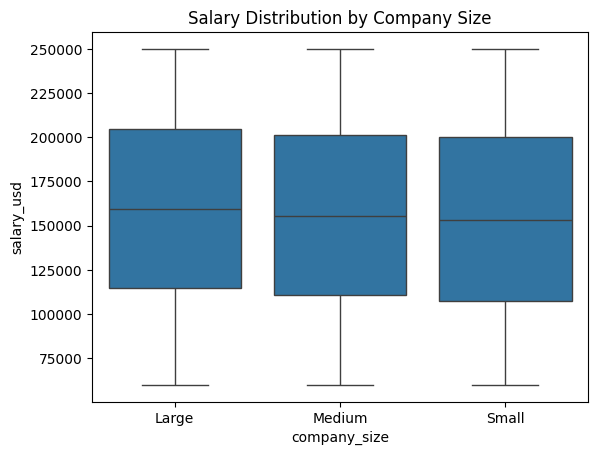

In [23]:
plt.figure()
sns.boxplot(x='company_size', y='salary_usd', data=df_high_salary)
plt.title("Salary Distribution by Company Size")
plt.show()
